In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
with open('./execution_data.json') as result_json:
    data = json.load(result_json)
    
    result_dict = {}
    
    result_dict["task_id"] = []
    result_dict["lambda_time"] = []
    result_dict["download_time"] = []
    result_dict["upload_time"] = []
    result_dict["execution_time"] = []
    result_dict["ram"] = []
    result_dict["cost"] = []
    result_dict["ts"] = []
    
    for record in data['montage_0.35']:
        for record_key in record.keys():
            result_dict[record_key].append(record[record_key])

In [3]:
df = pd.read_csv("results.csv") 
df

,task_name,lambda_time,download_time,upload_time,execution_time,ram,cost,ts,task_core
0,mDiffFit_8,459,379,71,8,2944,0.000024,1.603481e+09,mDiffFit
1,mDiffFit_8,351,311,34,5,2944,0.000019,1.603481e+09,mDiffFit
2,mDiffFit_8,747,689,38,16,1152,0.000015,1.603481e+09,mDiffFit
3,mProject_30,13851,393,240,13216,1920,0.000434,1.603481e+09,mProject
4,mProject_30,21063,327,272,20463,1152,0.000396,1.603481e+09,mProject
...,...,...,...,...,...,...,...,...,...
48111,mDiffFit_365,379,221,43,114,3008,0.000020,1.604221e+09,mDiffFit
48112,mBackground_40,1568,216,223,1128,1024,0.000027,1.604221e+09,mBackground
48113,mBackground_65,1862,502,177,1183,1024,0.000032,1.604221e+09,mBackground
48114,mBackground_10,2050,597,213,1251,1024,0.000035,1.604221e+09,mBackground


In [4]:

df = pd.DataFrame({"task_name" : list(result_dict["task_id"])})
df['lambda_time'] = pd.Series(list(result_dict["lambda_time"]), index=df.index)
df['download_time'] = pd.Series(list(result_dict["download_time"]), index=df.index)
df['upload_time'] = pd.Series(list(result_dict["upload_time"]), index=df.index)
df['execution_time'] = pd.Series(list(result_dict["execution_time"]), index=df.index)
df['ram'] = pd.Series(list(result_dict["ram"]), index=df.index)
df['cost'] = pd.Series(list(result_dict["cost"]), index=df.index)
df['ts'] = pd.Series(list(result_dict["ts"]), index=df.index)


In [5]:
df

,task_name,lambda_time,download_time,upload_time,execution_time,ram,cost,ts
0,mDiffFit_8,459,379,71,8,2944,0.000024,1603481324.07255
1,mDiffFit_8,351,311,34,5,2944,0.000019,1603481448.9180465
2,mDiffFit_8,747,689,38,16,1152,0.000015,1603481452.4749908
3,mProject_30,13851,393,240,13216,1920,0.000434,1603481469.2875435
4,mProject_30,21063,327,272,20463,1152,0.000396,1603481490.998285
...,...,...,...,...,...,...,...,...
49401,mDiffFit_365,379,221,43,114,3008,0.000020,1604220546.137337
49402,mBackground_40,1568,216,223,1128,1024,0.000027,1604220546.881725
49403,mBackground_65,1862,502,177,1183,1024,0.000032,1604220547.1533365
49404,mBackground_10,2050,597,213,1251,1024,0.000035,1604220548.505813


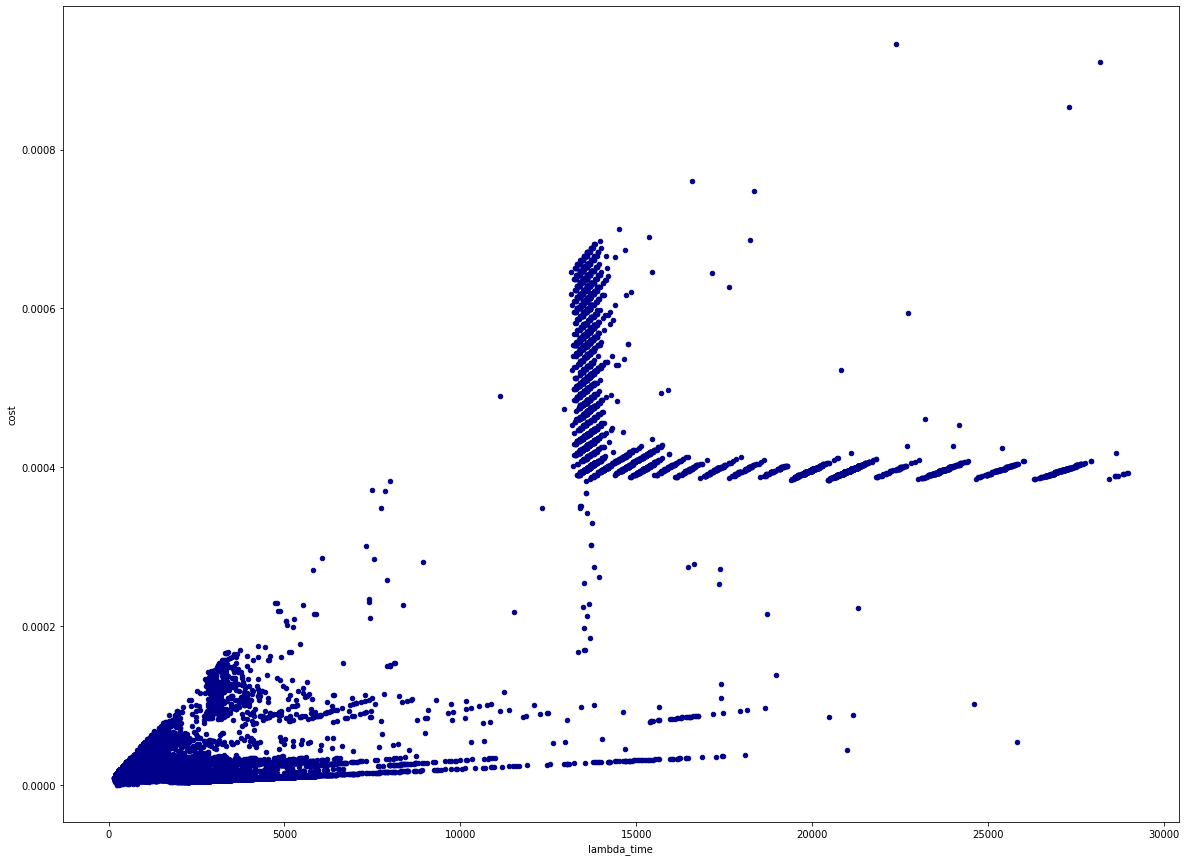

In [7]:
df = df[df['cost'] != -1]
df.plot.scatter(x='re',
                c='DarkBlue',
                figsize=(20,15))

In [8]:
df['task_core'] = df['task_name'].str.split('_', n = 0, expand = True)[0]

<ipython-input-8-48e07fdf16b9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['task_core'] = df['task_name'].str.split('_', n = 0, expand = True)[0]


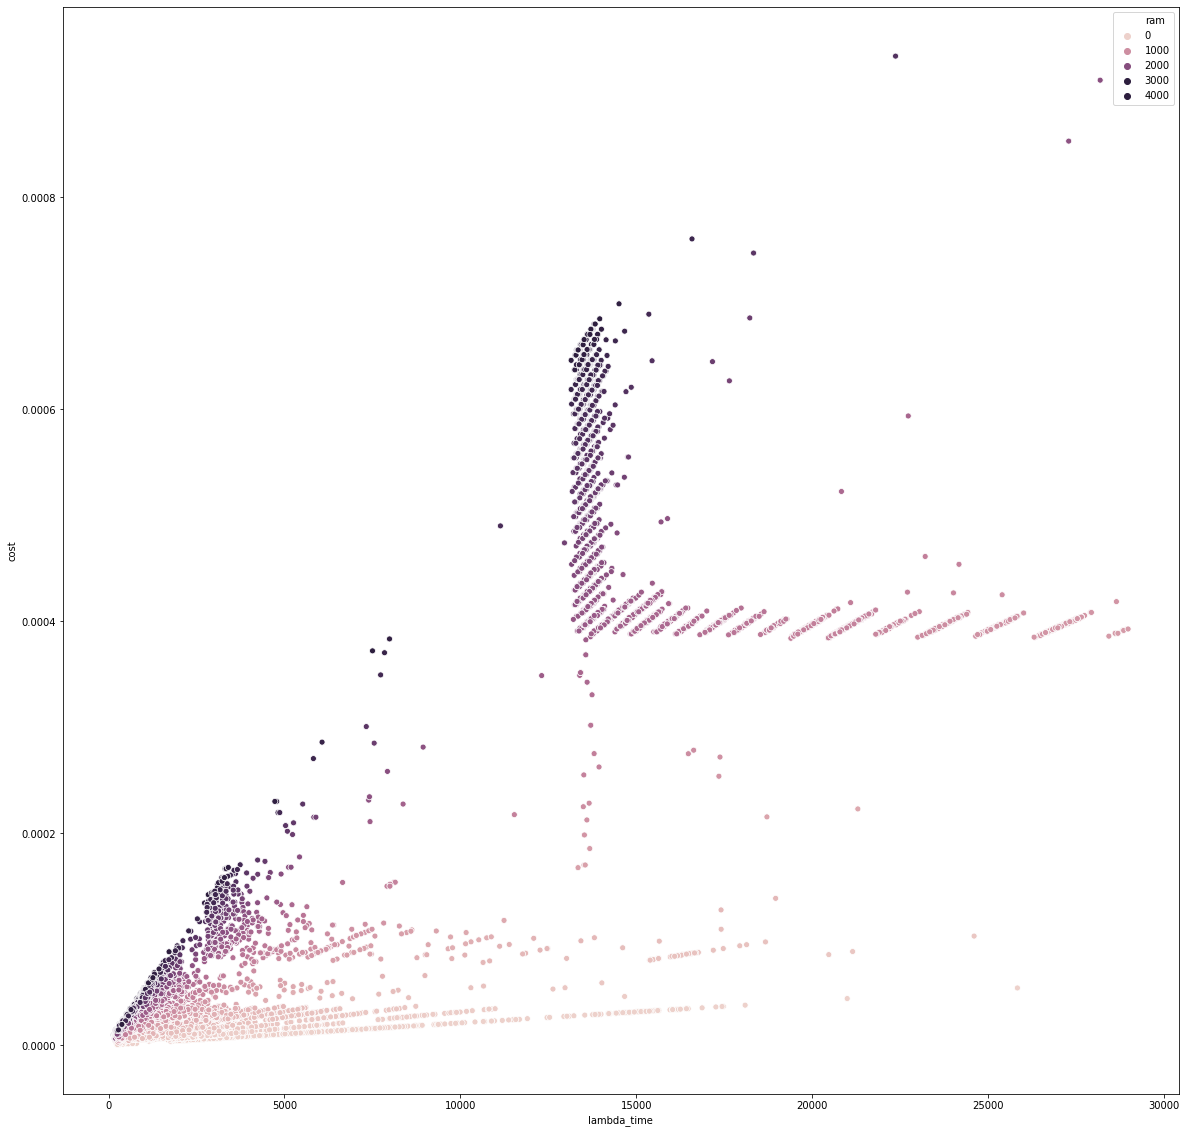

In [9]:
plt.figure(figsize=(20,20))
sns.scatterplot(data=df, x='lambda_time', y='cost', hue='ram')

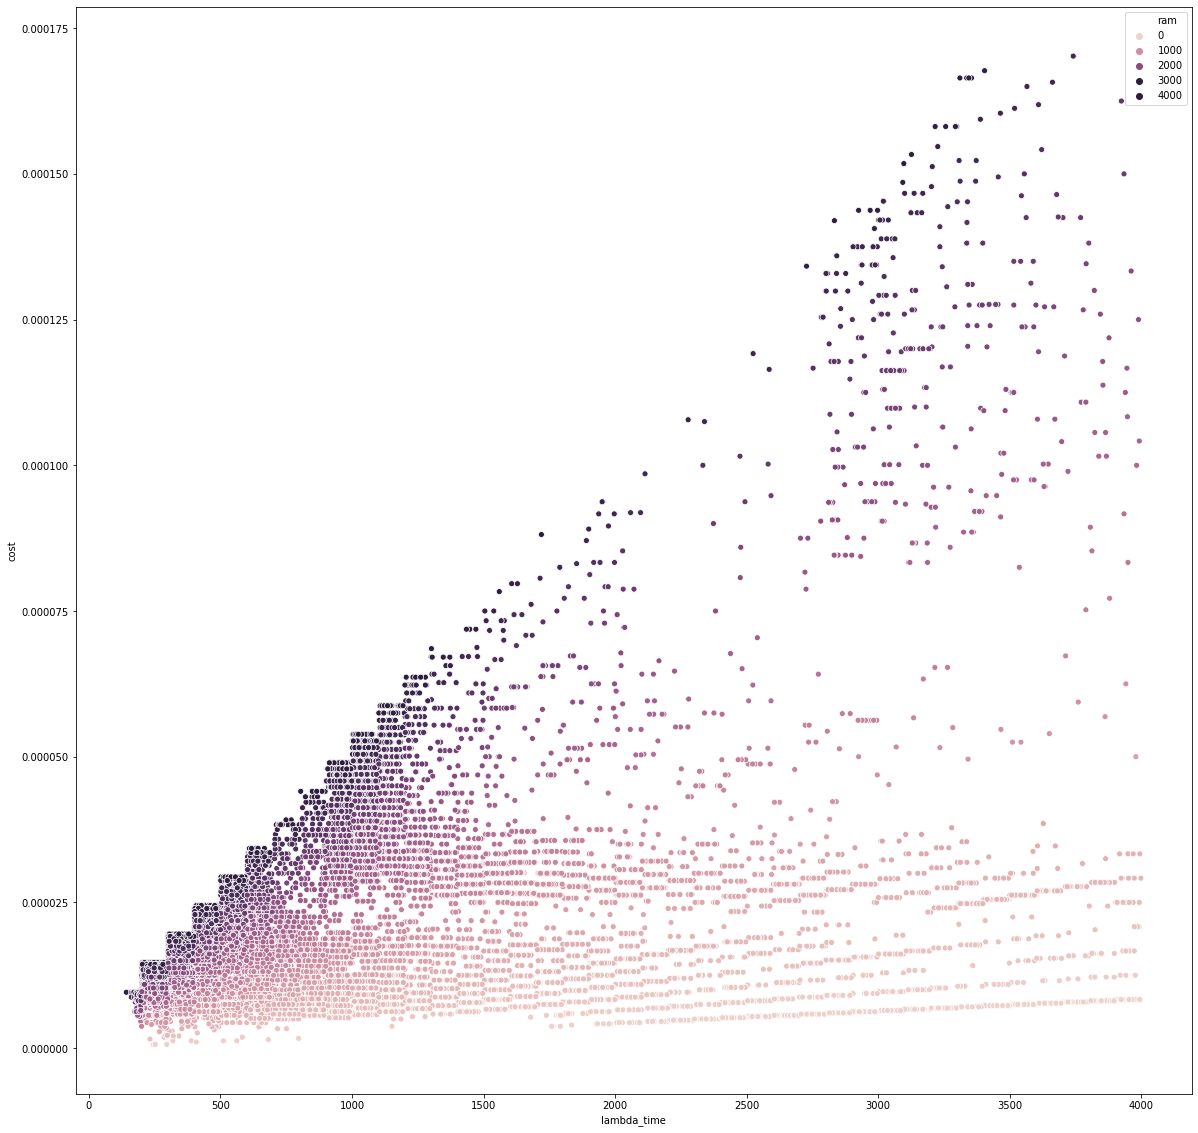

In [18]:
new_df = df[df['task_core'] == 'mAdd']
# new_df = new_df[new_df['ram'] == ]
new_df = df[df['cost'] < 0.00010]
new_df = df[df['lambda_time'] < 4_000]
plt.figure(figsize=(20,20))
sns.scatterplot(data=new_df, x='lambda_time', y='cost', hue='ram')

In [20]:
df.to_csv('./results.csv', index = False, header = True)

In [4]:
df['reward'] = (df['lambda_time'] +  35_000_000 * df['cost']) / 40_000
#df['new_cost'] = 35_000_000 * df['cost']

In [5]:
plt.figure(figsize=(20,20))
sns.scatterplot(data=df, x='reward', hue='task_core')

ValueError: Either both or neither of `x` and `y` must be specified (but try passing to `data`, which is more flexible).

<Figure size 1440x1440 with 0 Axes>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb509f84790>]],
      dtype=object)

<Figure size 1440x1440 with 0 Axes>

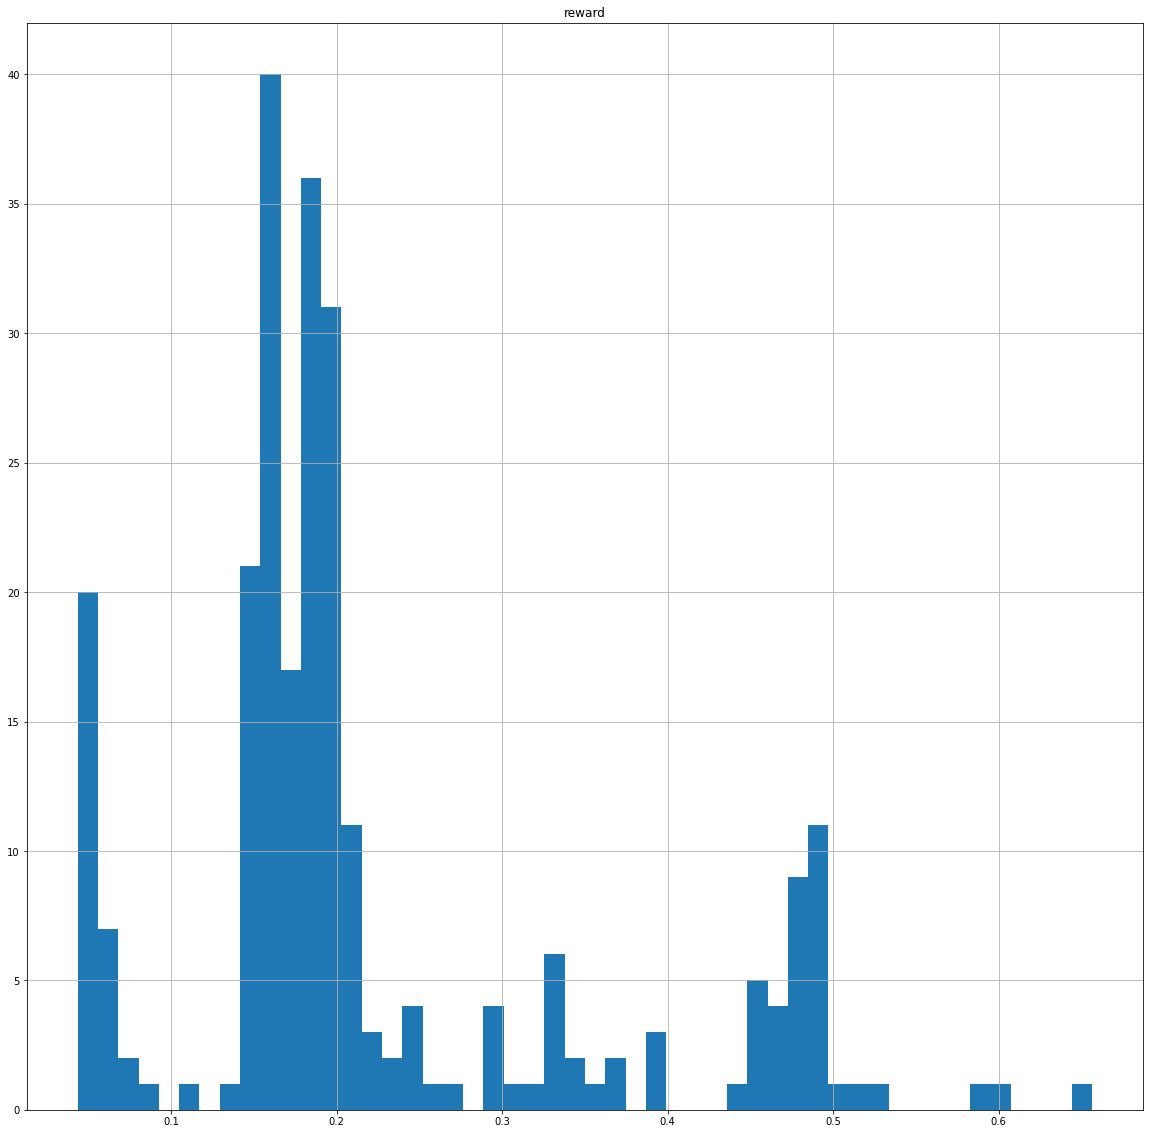

In [28]:
new_df = df[df['task_core'] =='mBgModel']
plt.figure( figsize=(20,20))
new_df.hist(column = 'reward',bins=50, figsize=(20,20))

In [48]:
df['new_upload_time'] = df['upload_time'] / 100
df.astype({'new_upload_time': 'int32'})

,task_name,lambda_time,download_time,upload_time,execution_time,ram,cost,ts,task_core,reward,new_cost,new_upload_time
0,mDiffFit_8,459,379,71,8,2944,0.000024,1603481324.07255,mDiffFit,0.032439,838.543344,0
1,mDiffFit_8,351,311,34,5,2944,0.000019,1603481448.9180465,mDiffFit,0.025546,670.834675,0
2,mDiffFit_8,747,689,38,16,1152,0.000015,1603481452.4749908,mDiffFit,0.031800,525.001050,0
3,mProject_30,13851,393,240,13216,1920,0.000434,1603481469.2875435,mProject,0.726354,15203.155406,2
4,mProject_30,21063,327,272,20463,1152,0.000396,1603481490.998285,mProject,0.872748,13846.902694,2
...,...,...,...,...,...,...,...,...,...,...,...,...
6313,mDiffFit_230,2699,2471,128,120,128,0.000006,1603528338.6676273,mDiffFit,0.072397,196.875394,1
6314,mDiffFit_4,2987,2620,259,100,128,0.000006,1603528397.036302,mDiffFit,0.080144,218.750438,2
6315,mBackground_80,1456,300,223,933,1408,0.000034,1603528399.1880345,mBackground,0.066478,1203.127406,2
6316,mDiffFit_287,5487,5019,219,239,128,0.000011,1603528471.686384,mDiffFit,0.147201,401.042469,2


In [26]:
df.groupby('task_core').count()

,task_name,lambda_time,download_time,upload_time,execution_time,ram,cost,ts,reward
task_core,,,,,,,,,
mAdd,244,244,244,244,244,244,244,244,244
mBackground,7081,7081,7081,7081,7081,7081,7081,7081,7081
mBgModel,255,255,255,255,255,255,255,255,255
mConcatFit,255,255,255,255,255,255,255,255,255
mDiffFit,33941,33941,33941,33941,33941,33941,33941,33941,33941
mImgtbl,211,211,211,211,211,211,211,211,211
mProject,5816,5816,5816,5816,5816,5816,5816,5816,5816
mViewer,313,313,313,313,313,313,313,313,313
